In [150]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import os
import json
import time
from datetime import datetime
from time import strptime
import calendar

In [151]:
restaurant_data = "../Group6-Project1/Repository/YoY_Seated_Diner_Data.csv"
restaurant_df = pd.read_csv(restaurant_data)
restaurant_df

city_new_york_df = restaurant_df.loc[(restaurant_df["Type"] == 'city')]
Name_newyork_df = city_new_york_df.loc[(city_new_york_df["Name"] == 'New York')]
Name_newyork_df

,Type,Name,18-Feb,19-Feb,20-Feb,21-Feb,22-Feb,23-Feb,24-Feb,25-Feb,...,16-Oct,17-Oct,18-Oct,19-Oct,20-Oct,21-Oct,22-Oct,23-Oct,24-Oct,25-Oct
88,city,New York,1,11,3,0,3,13,7,1,...,-82.3,-66.8,-68.88,-81.2,-78.49,-78.15,-78.38,-72.25,-66.73,-71.36


In [152]:
Name_newyork_df = Name_newyork_df.melt(id_vars=["Type", "Name"], var_name="Date", value_name="% Change")
Name_newyork_df['Year'] = 2020
date_pull = Name_newyork_df["Date"].str.split("-", n = 1, expand = True)
Name_newyork_df["Day"] = date_pull[0]
Name_newyork_df["Month"] = date_pull[1]
d = {'Jan':'01', 'Feb':'02', 'Mar':'03', 'Apr':'04', 'May':'05', 'Jun':'06', 'Jul':'07', 'Aug':'08', 'Sep':'09', 'Oct':10}
Name_newyork_df.Month = Name_newyork_df.Month.map(d)

cols = ['Year', 'Month', 'Day']
Name_newyork_df['combined'] = Name_newyork_df[cols].apply(lambda row: '-'.join(row.values.astype(str)), axis=1)

Name_newyork_df = Name_newyork_df[['combined','% Change', 'Month']].copy()
Name_newyork_df = Name_newyork_df.rename(columns = {'combined':'date'})
Name_newyork_df


,date,% Change,Month
0,2020-02-18,1.00,02
1,2020-02-19,11.00,02
2,2020-02-20,3.00,02
3,2020-02-21,0.00,02
4,2020-02-22,3.00,02
...,...,...,...
246,2020-10-21,-78.15,10
247,2020-10-22,-78.38,10
248,2020-10-23,-72.25,10
249,2020-10-24,-66.73,10


In [153]:
covid_numbers = "../Group6-Project1/Repository/data-HdO5F.csv"
covid_numbers_df = pd.read_csv(covid_numbers)
covid_numbers_df
new_covid_numbers_df = covid_numbers_df[["DATE_OF_INTEREST", "Cases"]]
new_covid_numbers_df = new_covid_numbers_df.rename(columns = {"DATE_OF_INTEREST" : "date"})
new_covid_numbers_df.head()
new_covid_numbers_df['date'] = pd.to_datetime(new_covid_numbers_df.date)
new_covid_numbers_df['date'] = new_covid_numbers_df['date'].astype(str)
new_covid_numbers_df.head()

,date,Cases
0,2020-02-29,1
1,2020-03-03,1
2,2020-03-04,5
3,2020-03-05,3
4,2020-03-06,8


In [154]:
merge_data1 = pd.merge(Name_newyork_df, new_covid_numbers_df, on='date')
merge_data1.head(50)

,date,% Change,Month,Cases
0,2020-02-29,-2.00,02,1
1,2020-03-10,-30.00,03,70
2,2020-03-11,-36.00,03,155
3,2020-03-12,-52.00,03,357
4,2020-03-13,-61.00,03,619
5,2020-03-14,-64.00,03,643
6,2020-03-15,-69.00,03,1036
7,2020-03-16,-77.00,03,2121
8,2020-03-17,-100.00,03,2452
9,2020-03-18,-100.00,03,2971


In [156]:
month_ave1 = month_ave1['Month'].astype(int).reset_index()
month_ave1 = merge_data1.groupby('Month').mean().reset_index()
month_ave1["Month"] = pd.to_datetime(month_ave1["Month"], format='%m').dt.month_name().str.slice(stop=3)
month_ave1

,Month,% Change,Cases
0,Oct,-75.600625,400.187500
1,Feb,-2.000000,1.000000
2,Mar,-85.863636,2959.136364
3,Apr,-100.000000,2941.666667
4,May,-99.511818,785.863636
5,Jun,-97.715238,326.523810
6,Jul,-91.431818,307.545455
7,Aug,-84.432273,246.272727
8,Sep,-80.339524,377.714286


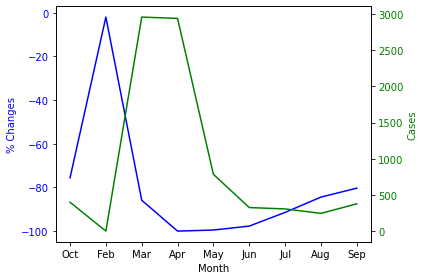

In [157]:
x = month_ave1['Month']
y = month_ave1['% Change']
y2 = month_ave1['Cases']
fig, ax1 = plt.subplots()
color = 'blue'
ax1.set_xlabel('Month')
ax1.set_ylabel('% Changes', color=color)
ax1.plot(x,y,color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'green'
ax2.set_ylabel('Cases', color=color)
ax2.plot(x,y2,color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

#plt.savefig(os.path.join(outputfilepath, "Restaurant Change % vs Cases"))